In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform,cdist
import sklearn

In [2]:
adata = sc.read('./adata_for_mingze.h5ad')
adata.obs

,Clusters,_X,_Y,label_def,GFP,Timepoint,leiden,label_c,Clone,label_c_time
SITTE2AACGGGATCAACTGGT,1,21.827168,-34.889477,Neutrophil-myeloid progenitor,GFP+,Day3,2,c8,Clone_1,c8_Day3
SITTE2AAACGAACACGCGCAT,3,-1.034184,1.390855,HSC_MPP,GFP+,Day3,6,c1,Clone_2,c1_Day3
SITTE2AACCACACACGACAAG,3,10.530747,-4.849030,Early Erythroid,GFP+,Day3,3,c5,Clone_3,c5_Day3
SITTE2AAAGGTACATCTGGGC,6,-29.615807,17.961159,HSC_MPP,GFP+,Day3,2,c1,NaN,c1_Day3
SITTE2AAACGAAAGCACCCAC,3,23.509193,-1.156073,HSC_MPP,GFP+,Day3,2,c1,NaN,c1_Day3
...,...,...,...,...,...,...,...,...,...,...
SITTB2TTTCAGTAGACTGGGT,2,21.386005,-19.252357,Monocyte precursor,GFP-,Day10,10,c10,NaN,c10_Day10
SITTB2TTTCCTCAGCCTGCCA,1,-13.000797,-3.205121,Mast cell,GFP-,Day10,4,c4,NaN,c4_Day10
SITTB2TTTCCTCGTGGGAGAG,1,-21.291006,21.387680,Mast cell,GFP-,Day10,4,c4,NaN,c4_Day10
SITTB2TTTCCTCGTGAGCTCC,3,-1.563915,4.886609,Monocyte precursor,GFP-,Day10,10,c10,NaN,c10_Day10


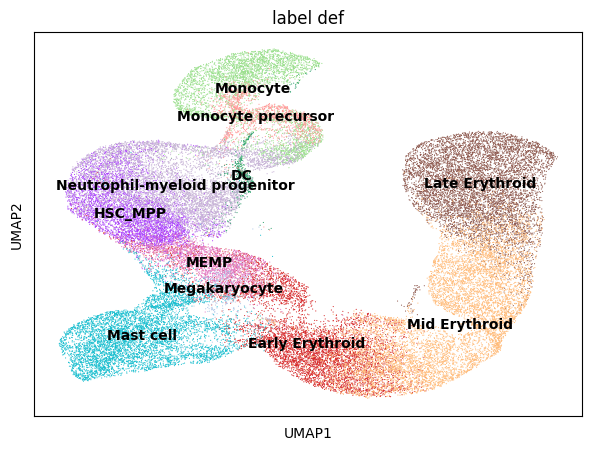

In [3]:
sc.pl.scatter(adata, basis='umap', color='label_def', legend_loc='on data')

In [4]:
adata_pos = adata[adata.obs['GFP'] == 'GFP+', :]
adata_pos

View of AnnData object with n_obs × n_vars = 29391 × 2572
    obs: 'Clusters', '_X', '_Y', 'label_def', 'GFP', 'Timepoint', 'leiden', 'label_c', 'Clone', 'label_c_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'GFP_colors', 'Timepoint_colors', 'diffmap_evals', 'doublet_info_colors', 'hvg', 'iroot', 'label_c_colors', 'label_c_sizes', 'label_def_colors', 'label_def_sizes', 'label_full_colors', 'label_full_sizes', 'label_red_colors', 'leiden', 'neighbors', 'paga', 'pca', 'phase_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
adata_neg = adata[adata.obs['GFP'] == 'GFP-', :]
adata_neg

View of AnnData object with n_obs × n_vars = 17556 × 2572
    obs: 'Clusters', '_X', '_Y', 'label_def', 'GFP', 'Timepoint', 'leiden', 'label_c', 'Clone', 'label_c_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'GFP_colors', 'Timepoint_colors', 'diffmap_evals', 'doublet_info_colors', 'hvg', 'iroot', 'label_c_colors', 'label_c_sizes', 'label_def_colors', 'label_def_sizes', 'label_full_colors', 'label_full_sizes', 'label_red_colors', 'leiden', 'neighbors', 'paga', 'pca', 'phase_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata_pos_barcode = adata_pos[[type(item) == str for item in list(adata_pos.obs['Clone'])], :]
adata_pos_barcode

View of AnnData object with n_obs × n_vars = 17892 × 2572
    obs: 'Clusters', '_X', '_Y', 'label_def', 'GFP', 'Timepoint', 'leiden', 'label_c', 'Clone', 'label_c_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'GFP_colors', 'Timepoint_colors', 'diffmap_evals', 'doublet_info_colors', 'hvg', 'iroot', 'label_c_colors', 'label_c_sizes', 'label_def_colors', 'label_def_sizes', 'label_full_colors', 'label_full_sizes', 'label_red_colors', 'leiden', 'neighbors', 'paga', 'pca', 'phase_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
adata_pos_barcode[adata_pos_barcode.obs['label_c_time'] == 'c7_Day3', :].shape

(0, 2572)

In [11]:
mat = pd.read_csv('./clone_matrix_yiming.csv', index_col=0) # only GFP+
mat['c7_Day3'] = 0.0
mat

,c8_Day3,c1_Day3,c5_Day3,c2_Day3,c4_Day3,c3_Day3,c9_Day3,c10_Day3,c11_Day3,c6_Day3,...,c4_Day17,c6_Day17,c7_Day17,c10_Day17,c8_Day17,c3_Day17,c1_Day17,c9_Day17,c2_Day17,c7_Day3
clone_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_3,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
clone_1765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_1766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_1767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clone_1768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
mat.sum().sum()

17892.0

In [9]:
# scale to actual values : we don't do this anymore!!
# df = mat.copy()
# df.loc[:,df.columns.str.endswith('_Day3')] = df.loc[:,df.columns.str.endswith('_Day3')] * 11000 / 3469
# df.loc[:,df.columns.str.endswith('_Day10')] = df.loc[:,df.columns.str.endswith('_Day10')] * 620000*(110/35) / 7586
# df.loc[:,df.columns.str.endswith('_Day17')] = df.loc[:,df.columns.str.endswith('_Day17')] * 126000000*(6200/6125)*(110/35) / 18366

In [13]:
mat = sc.AnnData(mat, dtype=np.float32)
mat

AnnData object with n_obs × n_vars = 1769 × 33

In [14]:
# create megaclones
sc.pp.filter_cells(mat, min_counts=5) # or more
sc.pp.filter_genes(mat, min_counts=1) # or more

In [15]:
mat

AnnData object with n_obs × n_vars = 372 × 28
    obs: 'n_counts'
    var: 'n_counts'

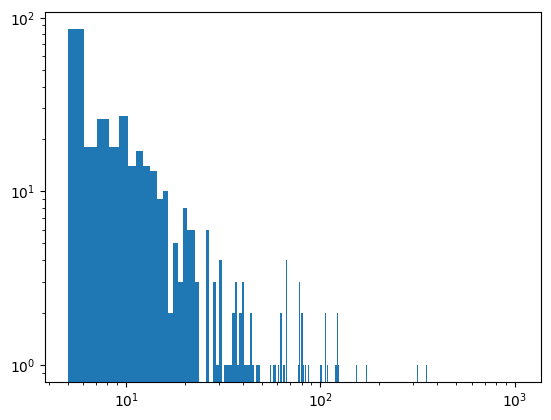

In [16]:
plt.hist(mat.obs.n_counts, bins=1000);
plt.yscale('log')
plt.xscale('log')

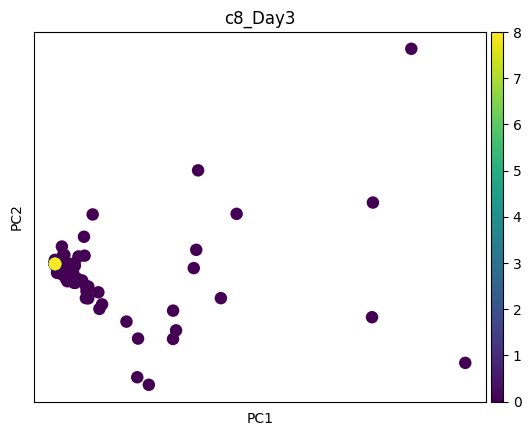

In [17]:
sc.tl.pca(mat)
sc.pl.pca(mat, color='c8_Day3')

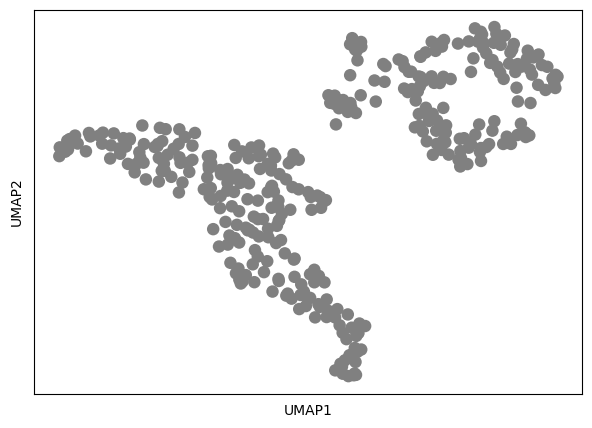

In [18]:
sc.pp.neighbors(mat)
sc.tl.umap(mat)
sc.pl.scatter(mat, basis='umap')

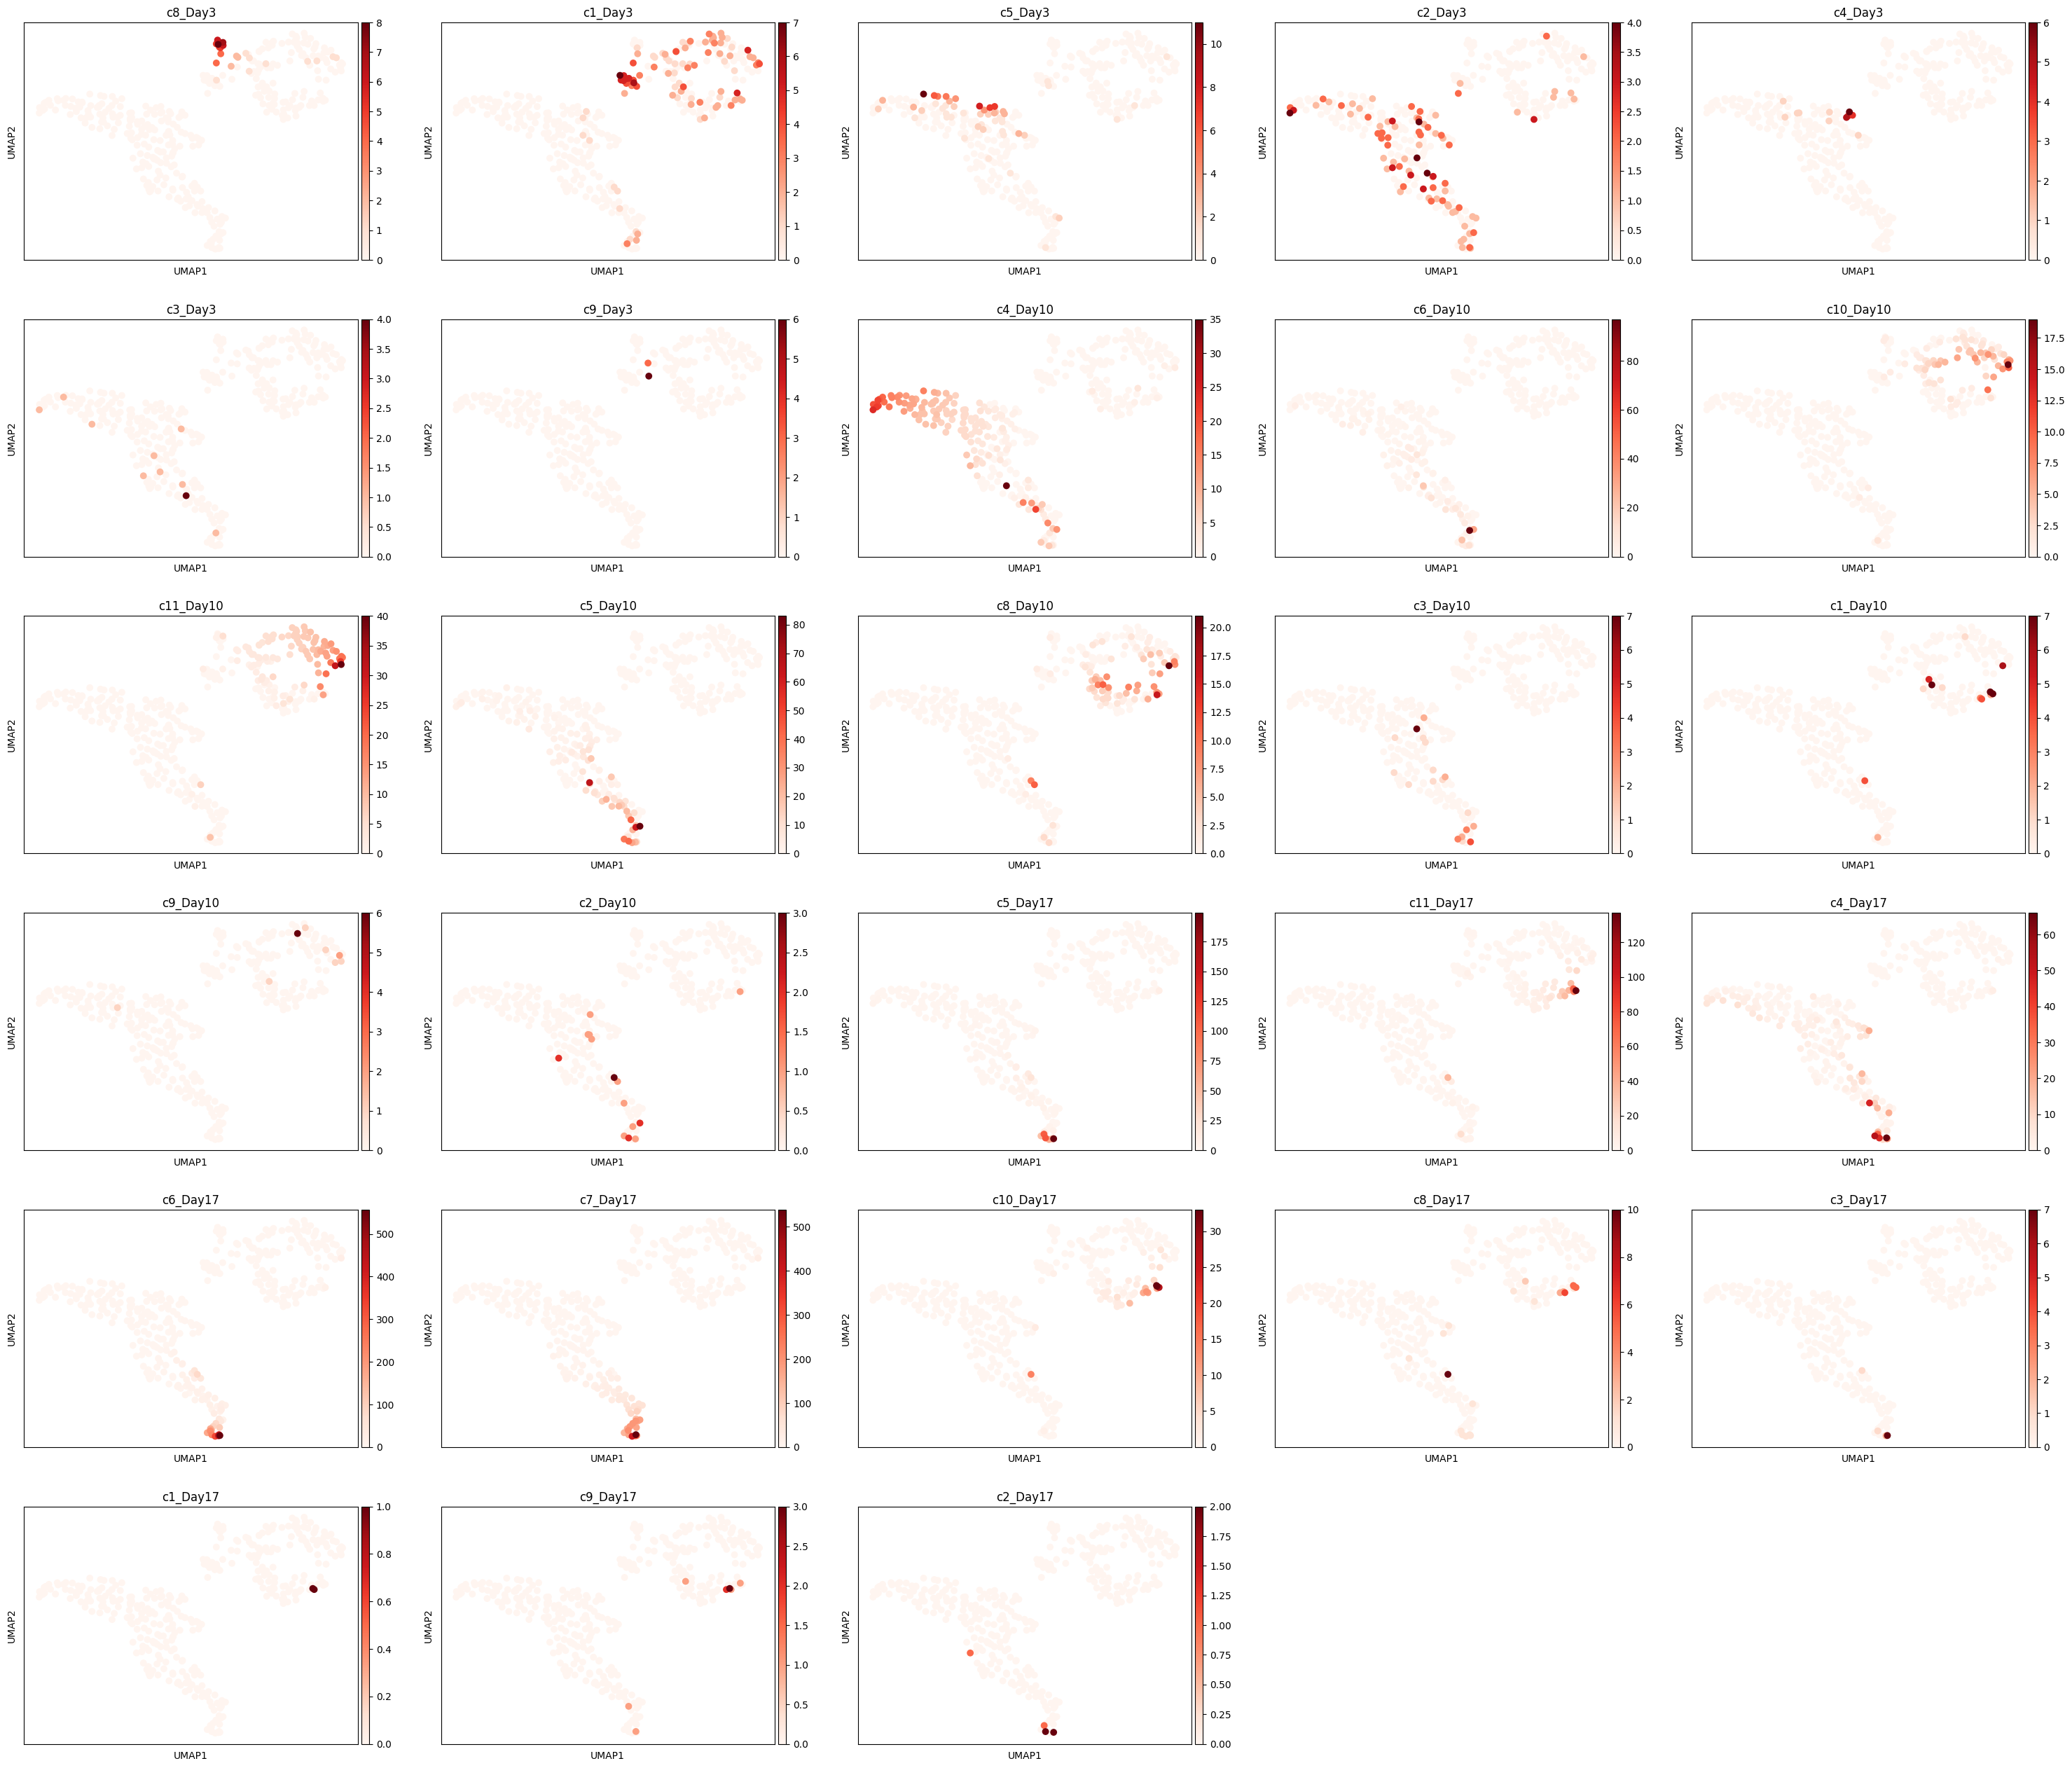

In [19]:
sc.pl.umap(mat, ncols=5, color=[col for col in mat.var_names], cmap='Reds', s=200)

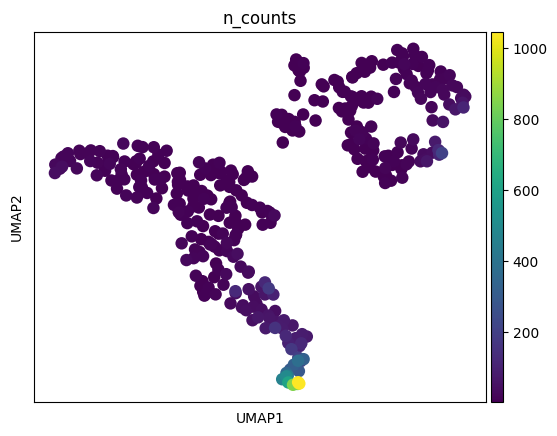

In [20]:
sc.pl.umap(mat, color='n_counts', legend_loc='on data')

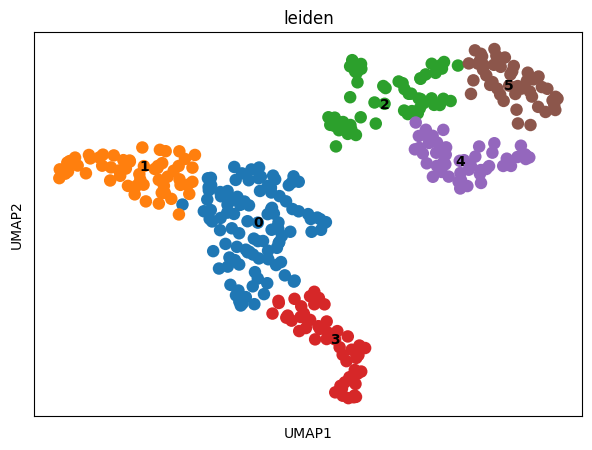

In [25]:
sc.tl.leiden(mat, resolution=.5)
sc.pl.scatter(mat, basis='umap', color='leiden', legend_loc='on data')

In [26]:
mat.obs.leiden.value_counts()

0    108
1     58
2     56
3     54
4     50
5     46
Name: leiden, dtype: int64

In [27]:
time = [3, 10, 17]
size_leiden = len(set(mat.obs.leiden))
size_time = len(time)
size_pops = len(set(adata.obs.label_def))

In [28]:
from natsort import natsorted
leiden = list(set(mat.obs.leiden))
leiden.sort()

In [29]:
mat

AnnData object with n_obs × n_vars = 372 × 28
    obs: 'n_counts', 'leiden'
    var: 'n_counts'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
kinetics_not_norm = np.zeros((size_leiden + 1, size_time, size_pops), dtype=np.float32)

for idi, leid in enumerate(leiden):
    for idj, time in enumerate([3, 10, 17]):
        for idk, pop in enumerate(['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10','c11']):
            if pop + '_Day' + str(time) in mat.var_names:
                kinetics_not_norm[idi, idj, idk] = \
                    np.array(mat[mat.obs.leiden == leid, mat.var_names == (pop + '_Day' + str(time))].X).sum()

In [31]:
kinetics_not_norm.sum()

15695.0

In [32]:
mat.X.sum()

15695.0

In [33]:
adata.obs

,Clusters,_X,_Y,label_def,GFP,Timepoint,leiden,label_c,Clone,label_c_time
SITTE2AACGGGATCAACTGGT,1,21.827168,-34.889477,Neutrophil-myeloid progenitor,GFP+,Day3,2,c8,Clone_1,c8_Day3
SITTE2AAACGAACACGCGCAT,3,-1.034184,1.390855,HSC_MPP,GFP+,Day3,6,c1,Clone_2,c1_Day3
SITTE2AACCACACACGACAAG,3,10.530747,-4.849030,Early Erythroid,GFP+,Day3,3,c5,Clone_3,c5_Day3
SITTE2AAAGGTACATCTGGGC,6,-29.615807,17.961159,HSC_MPP,GFP+,Day3,2,c1,NaN,c1_Day3
SITTE2AAACGAAAGCACCCAC,3,23.509193,-1.156073,HSC_MPP,GFP+,Day3,2,c1,NaN,c1_Day3
...,...,...,...,...,...,...,...,...,...,...
SITTB2TTTCAGTAGACTGGGT,2,21.386005,-19.252357,Monocyte precursor,GFP-,Day10,10,c10,NaN,c10_Day10
SITTB2TTTCCTCAGCCTGCCA,1,-13.000797,-3.205121,Mast cell,GFP-,Day10,4,c4,NaN,c4_Day10
SITTB2TTTCCTCGTGGGAGAG,1,-21.291006,21.387680,Mast cell,GFP-,Day10,4,c4,NaN,c4_Day10
SITTB2TTTCCTCGTGAGCTCC,3,-1.563915,4.886609,Monocyte precursor,GFP-,Day10,10,c10,NaN,c10_Day10


In [34]:
for idj, time in enumerate([3, 10, 17]):
    for idk, pop in enumerate(['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10','c11']):
        if pop + '_Day' + str(time) in adata.obs['label_c_time'].values:
            kinetics_not_norm[-1, idj, idk] = adata[adata.obs['label_c_time'] == (pop + '_Day' + str(time)), :].shape[0]

In [35]:
kinetics_not_norm.sum()

62642.0

In [36]:
15695+46947

62642

In [37]:
np.savetxt('./V3_Mingze/kinetics_array_correction_factor.txt', np.reshape(kinetics_not_norm, (size_leiden + 1, size_time * size_pops)))

In [42]:
len(set(adata.obs['Clone']))

1757

In [38]:
adata[[type(item) == str for item in list(adata.obs['Clone'])], :]

View of AnnData object with n_obs × n_vars = 17892 × 2572
    obs: 'Clusters', '_X', '_Y', 'label_def', 'GFP', 'Timepoint', 'leiden', 'label_c', 'Clone', 'label_c_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'GFP_colors', 'Timepoint_colors', 'diffmap_evals', 'doublet_info_colors', 'hvg', 'iroot', 'label_c_colors', 'label_c_sizes', 'label_def_colors', 'label_def_sizes', 'label_full_colors', 'label_full_sizes', 'label_red_colors', 'leiden', 'neighbors', 'paga', 'pca', 'phase_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [39]:
np.set_printoptions(suppress=True)
print(kinetics_not_norm.sum((1, 2)))
print(kinetics_not_norm.sum((0, 2)))
print(kinetics_not_norm.sum((0, 1)))

[ 1141.   870.   365. 11028.  1295.   996. 46947.]
[15935. 16958. 29749.]
[ 4910.  2518.   402.  7936.  8101. 12194. 12198.  6471.   519.  1796.
  5597.]


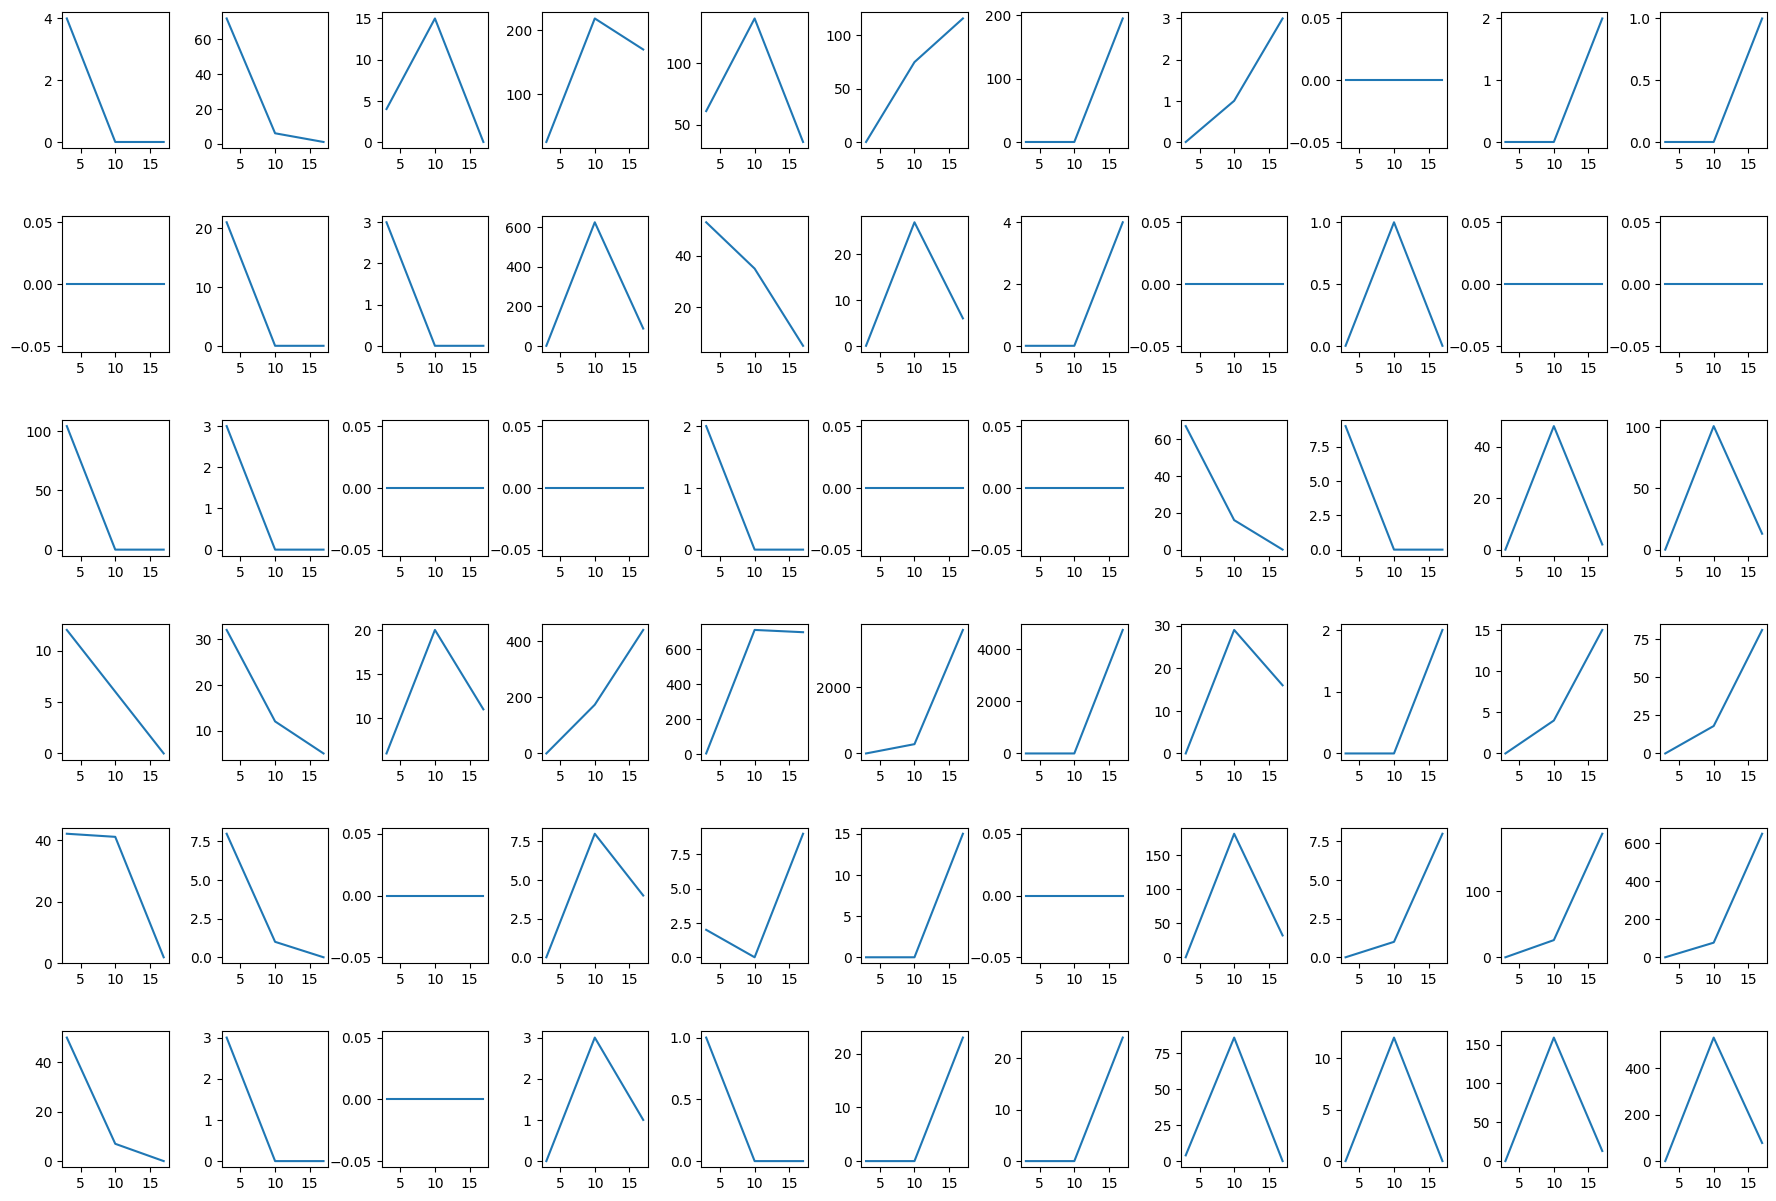

In [40]:
fig, ax = plt.subplots(size_leiden, size_pops, figsize=(22, 15))

for i in range(size_leiden):
    for j in range(size_pops):
        ax[i][j].plot([3, 10, 17], kinetics_not_norm[i, :, j])

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)